In [45]:
from preprocess import preprocess_dataset, reduce_dimensions
from sklearn.decomposition import PCA
import joblib

df, X_scaled, scaler = preprocess_dataset("data/metrics.csv")
X_scaled, pca = reduce_dimensions(X_scaled, n_components=10)

In [46]:
joblib.dump(pca, "data/pca.pkl")
joblib.dump(scaler, "data/scaler.pkl")

['data/scaler.pkl']

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

joblib.dump(kmeans, "data/kmeans.pkl")
print(labels_kmeans[:10])

[2 2 2 2 1 1 0 2 2 2]


In [48]:
X_pca, pca = reduce_dimensions(X_scaled, n_components=2)

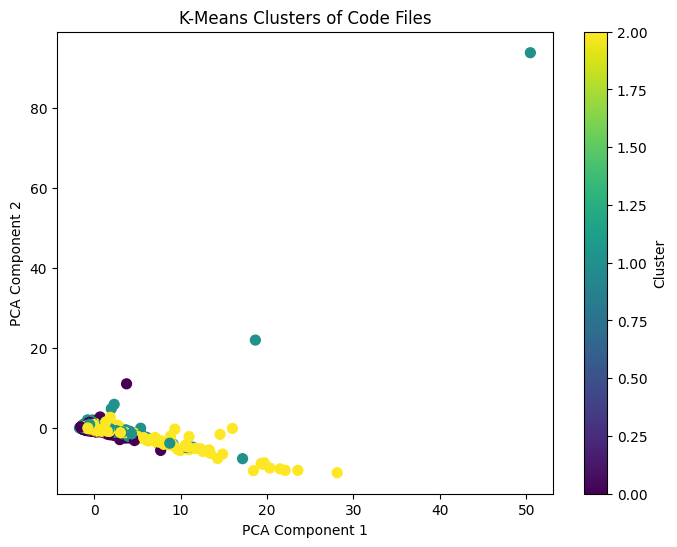

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=50)
plt.title("K-Means Clusters of Code Files")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [50]:
df['cluster'] = labels_kmeans
print(df['cluster'].value_counts())


cluster
2    2264
1    1027
0     698
Name: count, dtype: int64


In [51]:
df_kmeans = df.copy()
df_kmeans['cluster'] = labels_kmeans
cluster_stats = df_kmeans.groupby('cluster')['cyclomatic_complexity'].mean()

sorted_clusters = cluster_stats.sort_values().index.tolist()
cluster_mapping = {sorted_clusters[0]: 'Bad', sorted_clusters[1]: 'Average', sorted_clusters[2]: 'Good'}

joblib.dump(cluster_mapping, "data/cluster_mapping.pkl")

['data/cluster_mapping.pkl']

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

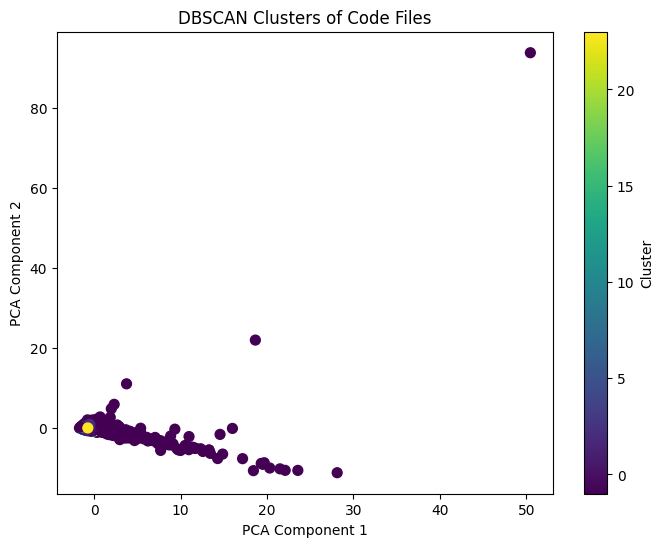

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='viridis', s=50)
plt.title("DBSCAN Clusters of Code Files")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [54]:
df['cluster'] = labels_dbscan
print(df['cluster'].value_counts())


cluster
-1     2027
 0     1172
 1      284
 2      273
 4       72
 6       49
 11      11
 18      10
 9        9
 7        8
 21       6
 8        6
 5        6
 3        6
 13       5
 23       5
 14       5
 12       5
 16       5
 17       5
 19       5
 15       4
 20       4
 22       4
 10       3
Name: count, dtype: int64
